#**Importing the Required Libraries**

In [1]:
import os

In [2]:
import glob

In [3]:
from IPython.display import Image, display

In [4]:
from IPython import display

In [5]:
display.clear_output()

# **In the First Step, We need to check whether we have access to the GPU or not**

In [6]:
!nvidia-smi

Sun Oct 15 14:47:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
HOME = os.getcwd()

In [8]:
print(HOME)

/content


#**Installing Ultralytics using Pip Install**

In [9]:
!pip install ultralytics==8.0.0

##Checking whether YOLOv8 is Installed and its working Fine

In [10]:
import ultralytics

In [11]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [12]:
!mkdir {HOME}/datasets


In [13]:
!pwd

/content


In [14]:
%cd {HOME}/datasets


/content/datasets


In [15]:
!pwd

/content/datasets


In [16]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="EUqOhKVsaMqiW0e4vbte")
project = rf.workspace("fpt-bkrjl").project("detect_fpt-yibqj")
dataset = project.version(2).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstall

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.0, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Detect_FPT-2 in yolov8:: 100%|██████████| 27852/27852 [00:08<00:00, 3470.02it/s] 


#**Train the YOLOv8 Model on the Custom Dataset**

In [17]:
%cd {HOME}

/content


In [18]:
%cd {dataset.location}

/content/datasets/Detect_FPT-2


In [19]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8m.pt data=/content/datasets/Detect_FPT-2/data.yaml epochs=10 imgsz=640

/content
100% 49.7M/49.7M [00:00<00:00, 289MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/datasets/Detect_FPT-2/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.9

In [ ]:
!ls {HOME}//runs/detect/train

args.yaml  weights


#**Displaying the Confusion Matrix**

/content


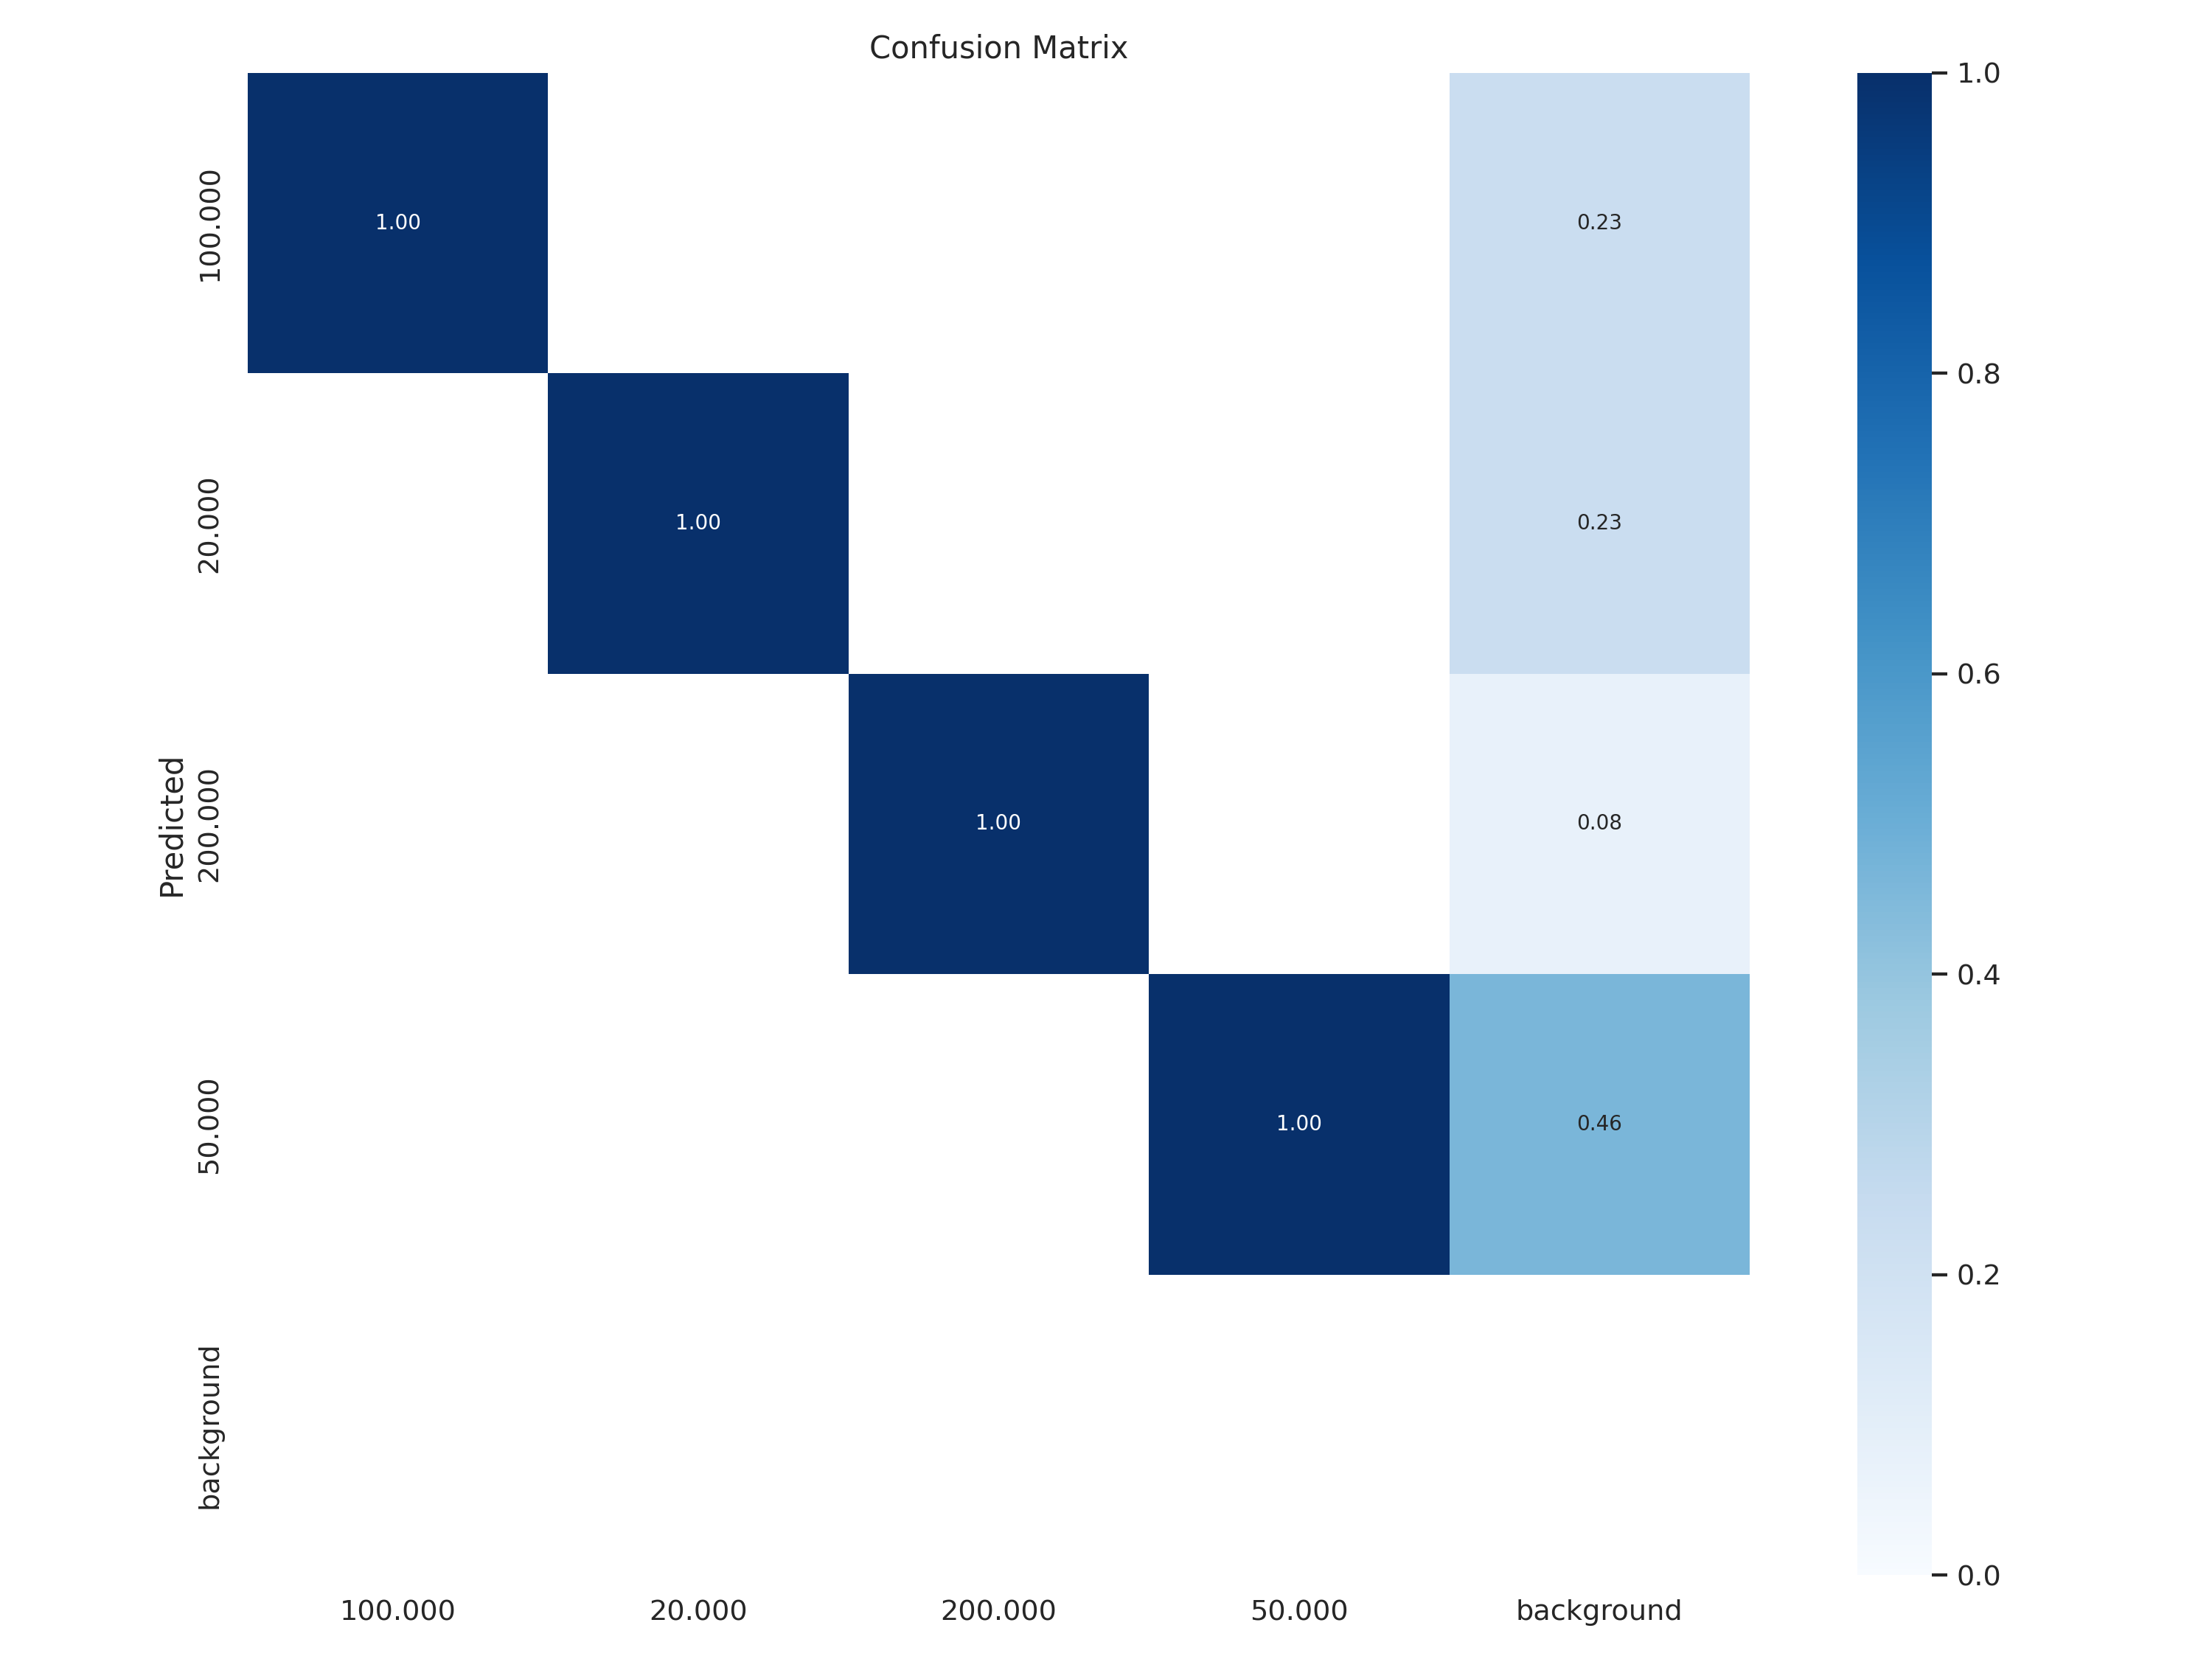

In [ ]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
%cd {HOME}
Image(filename=f'/content/runs/detect/train2/confusion_matrix.png', width=900)

#**Training and Validation Loss**

/content


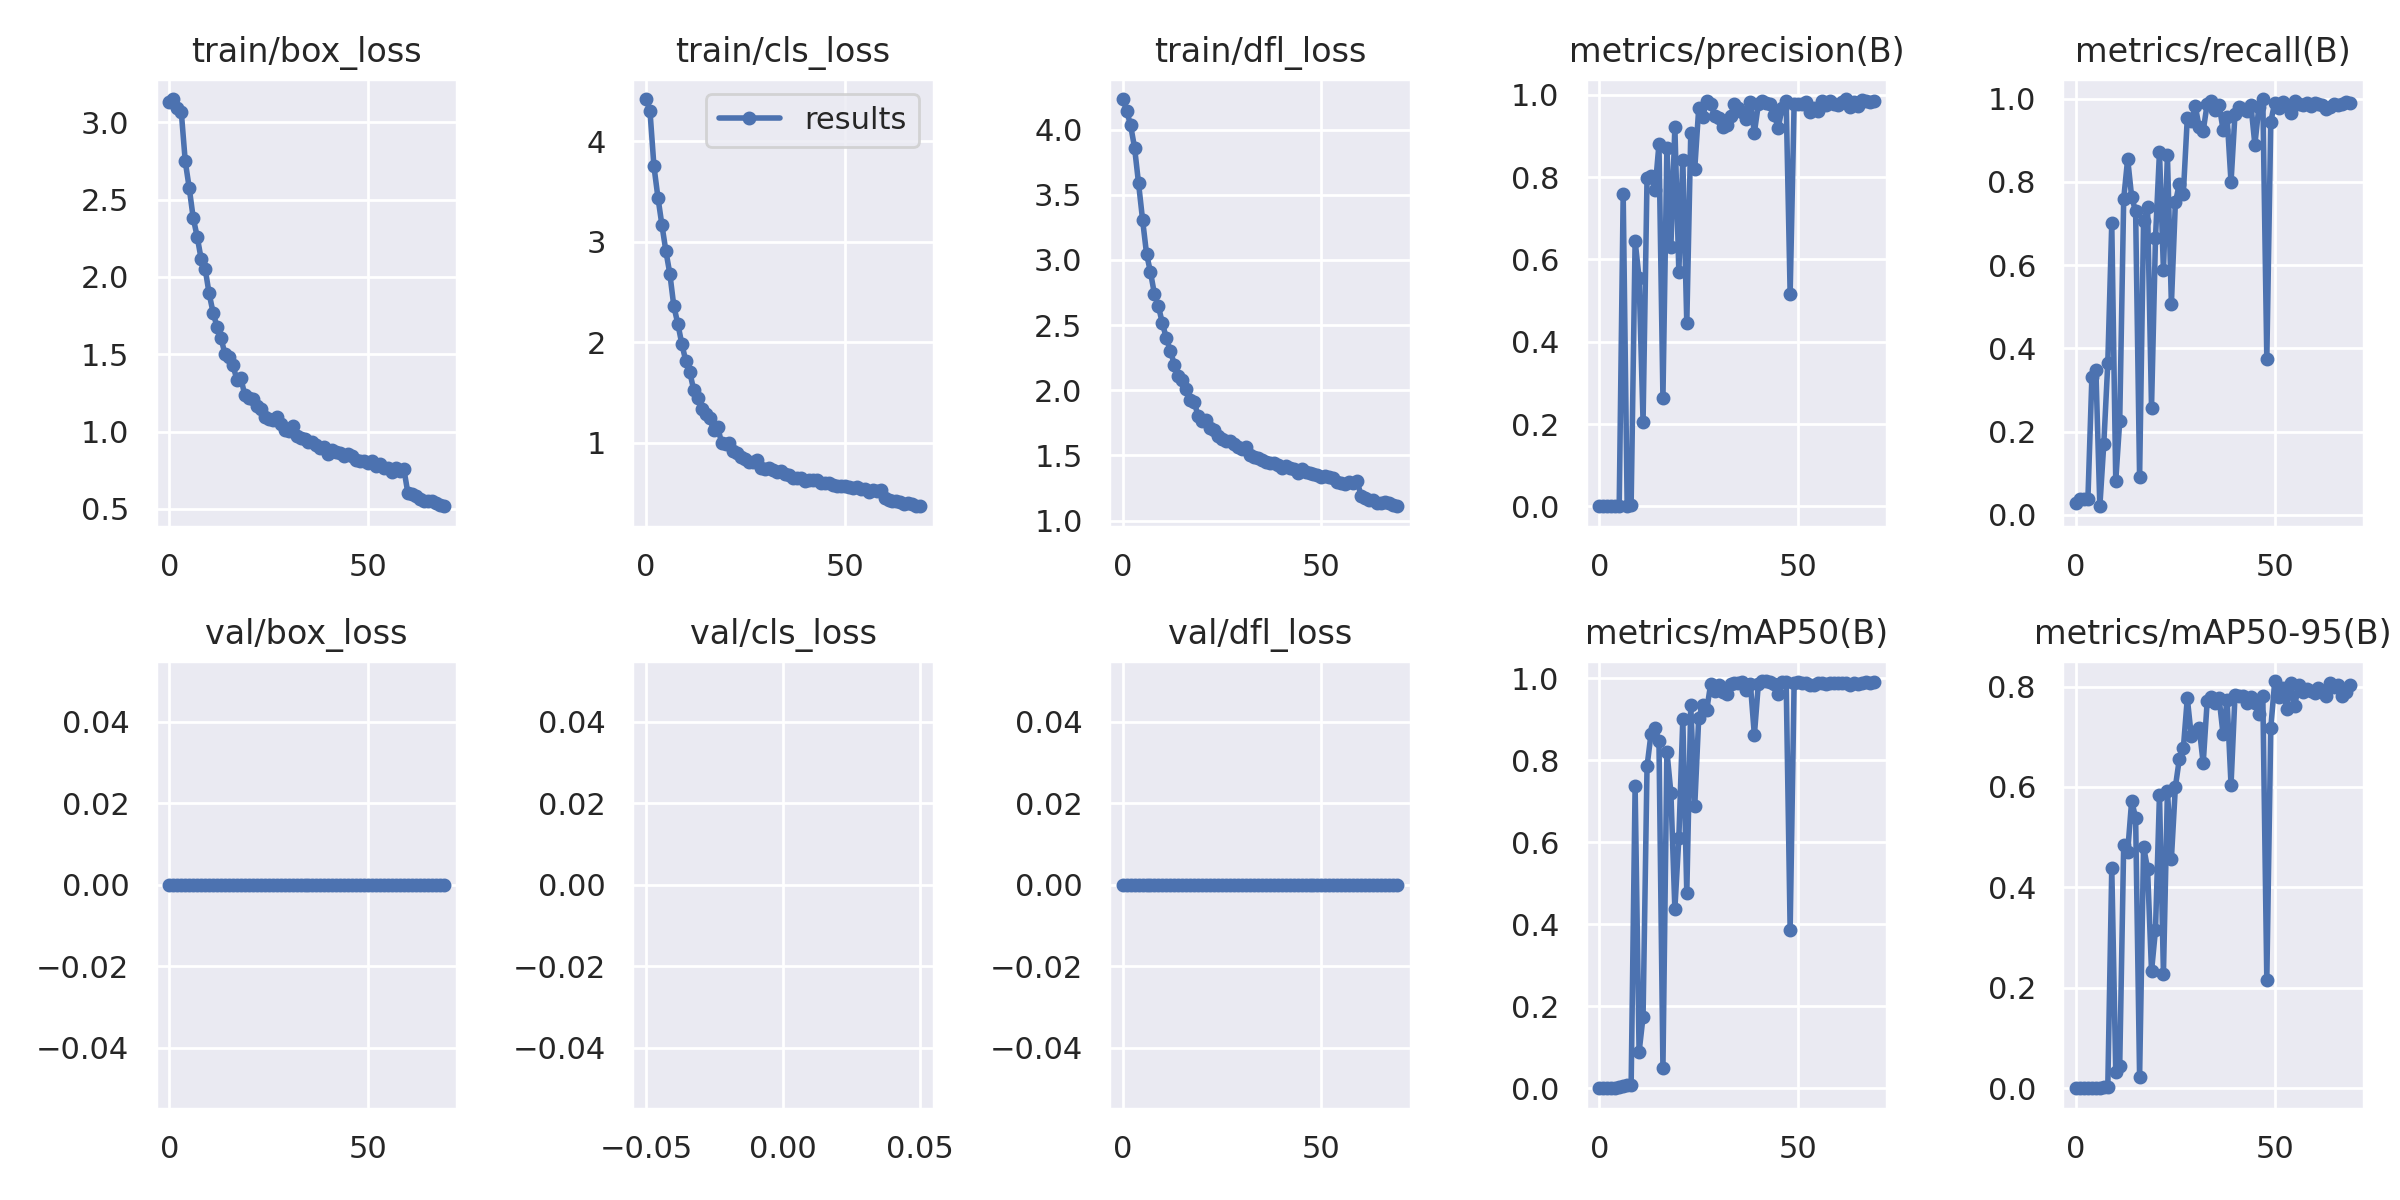

In [ ]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results
%cd {HOME}

Image(filename=f'/content/runs/detect/train2/results.png', width=1000)

/content


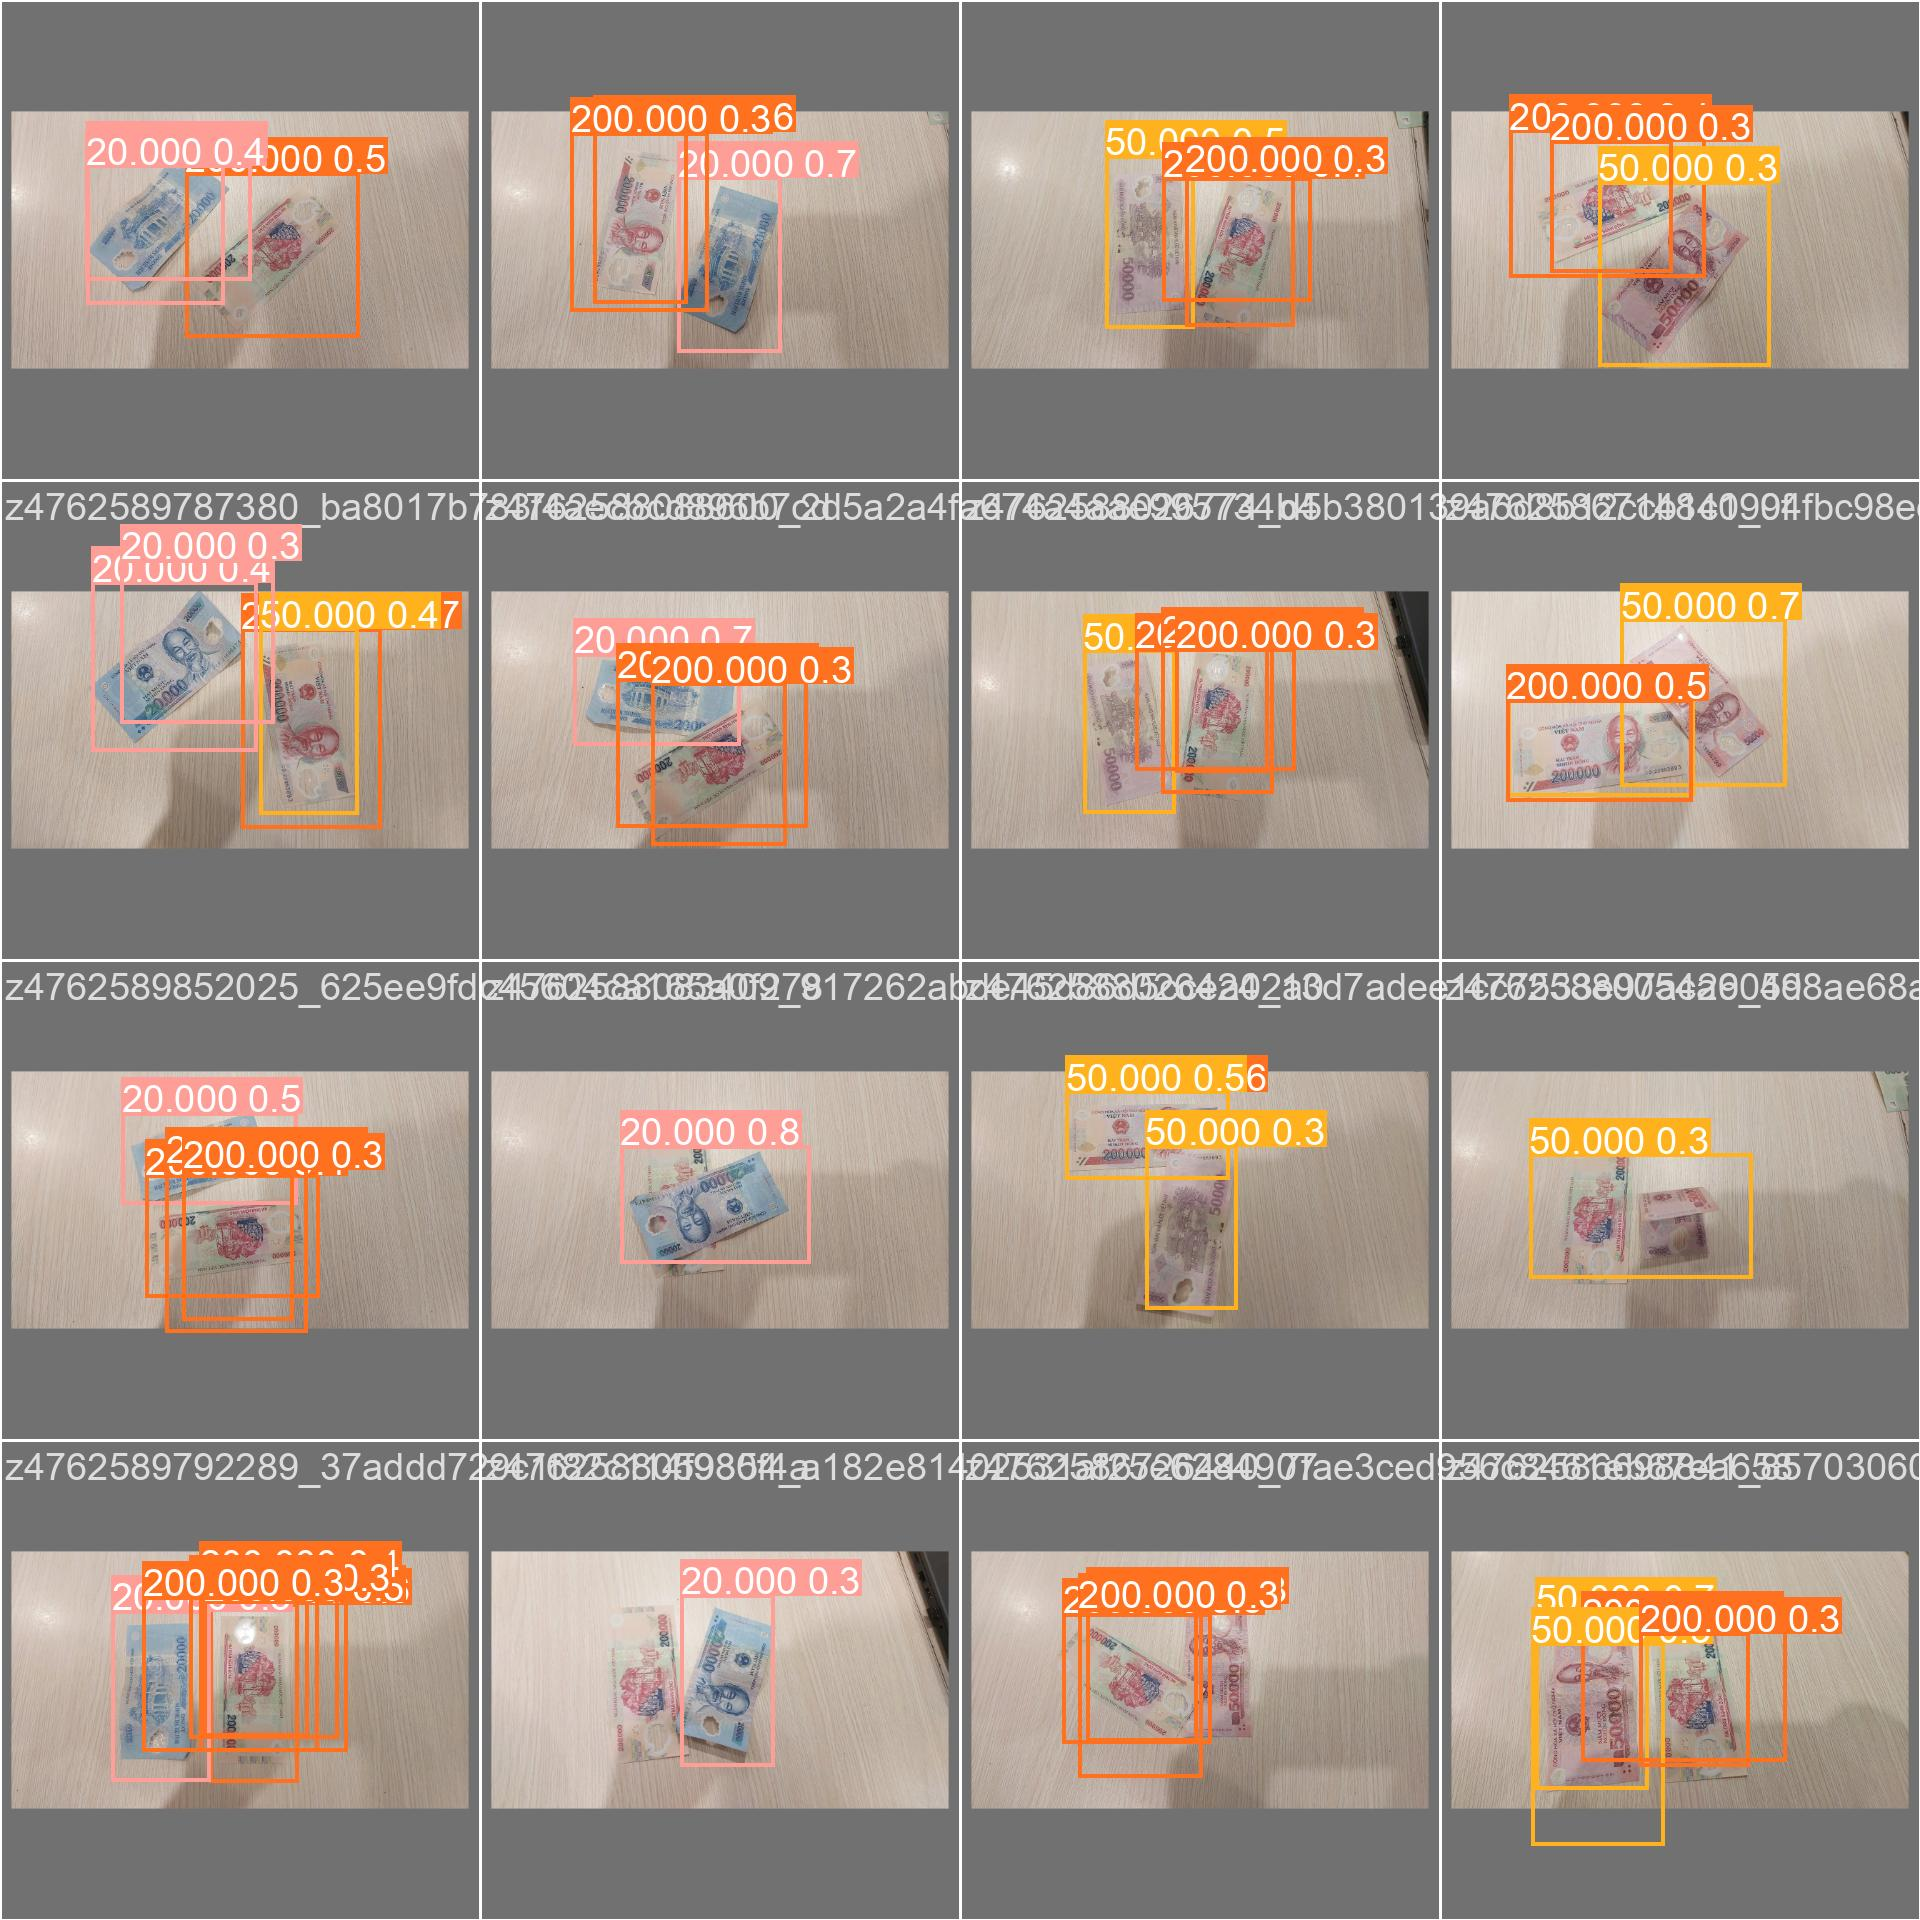

In [ ]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
%cd {HOME}
Image(filename=f'/content/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [ ]:


#Ở đây, chúng tôi đang lấy trọng số tốt nhất của mô hình và sử dụng chúng để xác thực mô hình. Tương tự như trước đây chúng tôi đang sử dụng
#CLI để làm điều đó, Sự khác biệt duy nhất là mode = val của chúng tôi thay vì train
#Validation Script đang sử dụng tập dữ liệu thử nghiệm chưa được sử dụng trước đó

%cd {HOME}

!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/datasets/Money-Detect-1/data.yaml

/content
2023-10-08 11:50:33.968707: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 11:50:34.969864: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/datasets/Money-Detect-1/valid/labels.cache... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:04<00:00,  1.04s/it]
                   all         50        101      0.974      0.989       0.99      0.809
               100.000 

#**Inference with Custom Model**

In [ ]:
# Testing the Model on Test Dataset images
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/Money-Detect-1/test/images/z4762586760623_023d4f7a13089bf99b4200a45916593c-1-_jpg.rf.7460c6e40d37cadf6e1cbe65ffffaa09.jpg

/content
2023-10-08 14:49:50.203053: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-08 14:49:51.319425: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/Money-Detect-1/test/images/z4762586760623_023d4f7a13089bf99b4200a45916593c-1-_jpg.rf.7460c6e40d37cadf6e1cbe65ffffaa09.jpg: 384x640 2 200.000s, 1 50.000, 71.8ms
Speed: 0.6ms pre-process, 71.8ms inference, 104.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


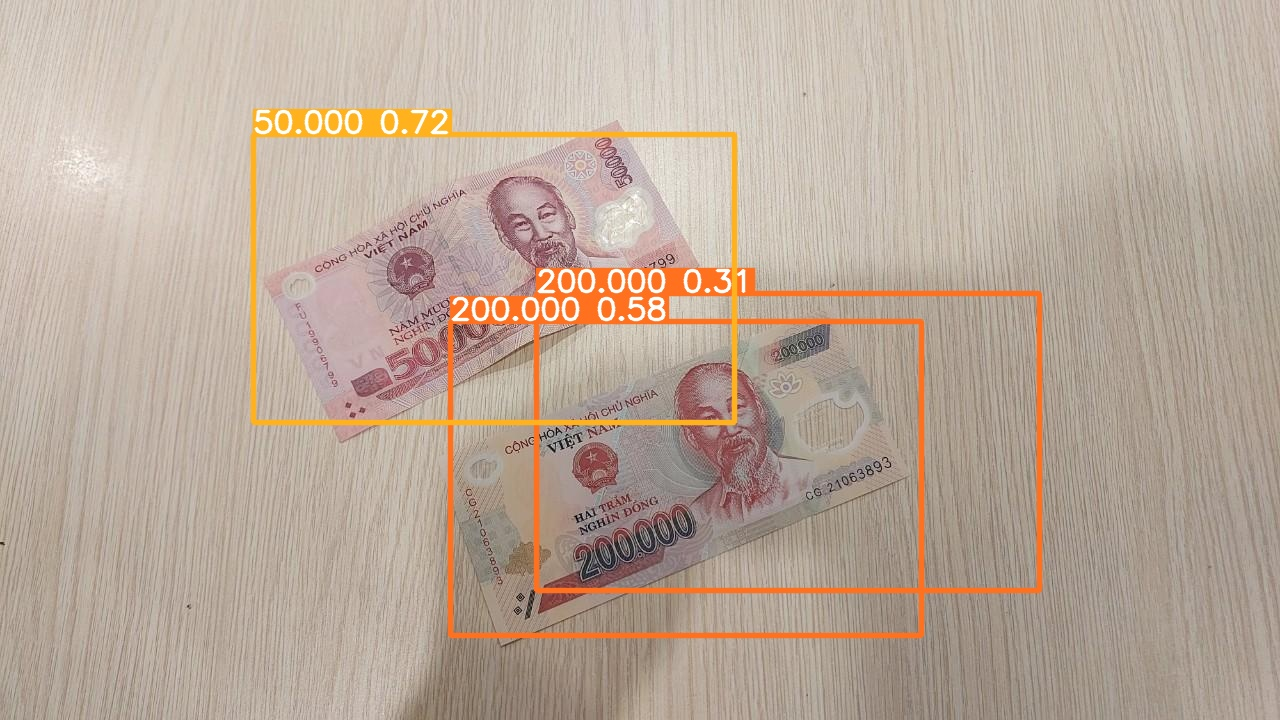

In [ ]:
Image("/content/runs/detect/predict/z4762586760623_023d4f7a13089bf99b4200a45916593c-1-_jpg.rf.7460c6e40d37cadf6e1cbe65ffffaa09.jpg")

#**Testing on a Demo Video**

In [ ]:
!gdown "https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1iMitK9VCUWmBcZiiEPHK1d2pydALof6s&confirm=t
To: /content/demo.mp4
100% 4.39M/4.39M [00:00<00:00, 232MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source='/content/demo.mp4'

/content
Ultralytics YOLOv8.0.0 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/324) /content/demo.mp4: 384x640 3 potholes, 27.2ms
video 1/1 (2/324) /content/demo.mp4: 384x640 2 potholes, 26.4ms
video 1/1 (3/324) /content/demo.mp4: 384x640 2 potholes, 23.7ms
video 1/1 (4/324) /content/demo.mp4: 384x640 2 potholes, 23.7ms
video 1/1 (5/324) /content/demo.mp4: 384x640 3 potholes, 23.7ms
video 1/1 (6/324) /content/demo.mp4: 384x640 4 potholes, 23.7ms
video 1/1 (7/324) /content/demo.mp4: 384x640 2 potholes, 23.7ms
video 1/1 (8/324) /content/demo.mp4: 384x640 4 potholes, 17.0ms
video 1/1 (9/324) /content/demo.mp4: 384x640 5 potholes, 16.7ms
video 1/1 (10/324) /content/demo.mp4: 384x640 4 potholes, 16.7ms
video 1/1 (11/324) /content/demo.mp4: 384x640 5 potholes, 16.6ms
video 1/1 (12/324) /content/demo.mp4: 384x640 4 potholes, 16.6ms
video 1/1 (13/324) /content/demo.mp4: 384x6

#**Display the Demo Video**

In [ ]:
!rm "/content/result_compressed.mp4"

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict2/demo.mp4'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
model.export(format='onnx')
